In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df = df.drop('Unnamed: 32', axis = 1)

df = df.drop('id', axis = 1)
df['diagnosis'] = df['diagnosis'].map({'M': 1,'B': 0})
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [4]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values


In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=128, test_size=0.33)

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), alpha=0.01, solver="adam", verbose=10,
                    random_state=1,
                    batch_size=64,
                    learning_rate_init=0.001,
                    activation='relu',
                    early_stopping=True,
                    validation_fraction=0.2,
                    n_iter_no_change=10
)

In [8]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.69771802
Validation score: 0.636364
Iteration 2, loss = 0.66298842
Validation score: 0.636364
Iteration 3, loss = 0.63779904
Validation score: 0.636364
Iteration 4, loss = 0.61786049
Validation score: 0.779221
Iteration 5, loss = 0.59220851
Validation score: 0.831169
Iteration 6, loss = 0.56100017
Validation score: 0.831169
Iteration 7, loss = 0.53190725
Validation score: 0.831169
Iteration 8, loss = 0.49990626
Validation score: 0.909091
Iteration 9, loss = 0.46315624
Validation score: 0.922078
Iteration 10, loss = 0.42557761
Validation score: 0.922078
Iteration 11, loss = 0.38432503
Validation score: 0.948052
Iteration 12, loss = 0.34176179
Validation score: 0.948052
Iteration 13, loss = 0.30183615
Validation score: 0.935065
Iteration 14, loss = 0.26818827
Validation score: 0.948052
Iteration 15, loss = 0.23953302
Validation score: 0.935065
Iteration 16, loss = 0.21554737
Validation score: 0.935065
Iteration 17, loss = 0.19709711
Validation score: 0.922078
Iterat

In [9]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.947507
Test set score: 0.941489


In [10]:
from sklearn.metrics import classification_report

Y_pred = mlp.predict(X_test)
y_pred = np.round(Y_pred).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       116
           1       1.00      0.85      0.92        72

    accuracy                           0.94       188
   macro avg       0.96      0.92      0.94       188
weighted avg       0.95      0.94      0.94       188



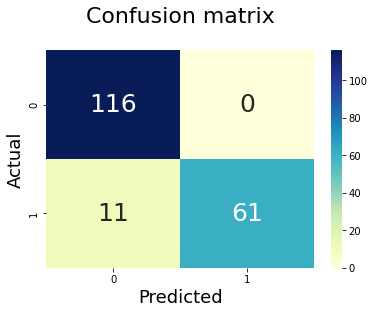

In [11]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), alpha=0.01, solver="adam", verbose=10,
                    random_state=2,
                    batch_size=64,
                    learning_rate_init=0.001,
                    activation='relu',
                    early_stopping=True,
                    validation_fraction=0.2,
                    n_iter_no_change=10
)

In [13]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(mlp, X, y, cv=10, scoring = 'f1')
print ("mean validation F1:",
       "%0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))

Iteration 1, loss = 0.70997042
Validation score: 0.650485
Iteration 2, loss = 0.68736752
Validation score: 0.796117
Iteration 3, loss = 0.65790008
Validation score: 0.912621
Iteration 4, loss = 0.62475480
Validation score: 0.932039
Iteration 5, loss = 0.59247230
Validation score: 0.922330
Iteration 6, loss = 0.55379594
Validation score: 0.912621
Iteration 7, loss = 0.51133180
Validation score: 0.922330
Iteration 8, loss = 0.46163331
Validation score: 0.922330
Iteration 9, loss = 0.40449235
Validation score: 0.932039
Iteration 10, loss = 0.35561595
Validation score: 0.941748
Iteration 11, loss = 0.31152802
Validation score: 0.951456
Iteration 12, loss = 0.27659536
Validation score: 0.951456
Iteration 13, loss = 0.25055834
Validation score: 0.951456
Iteration 14, loss = 0.22673289
Validation score: 0.970874
Iteration 15, loss = 0.20629253
Validation score: 0.961165
Iteration 16, loss = 0.19116370
Validation score: 0.970874
Iteration 17, loss = 0.17713336
Validation score: 0.970874
Iterat

Iteration 17, loss = 0.17028135
Validation score: 0.961165
Iteration 18, loss = 0.16054333
Validation score: 0.970874
Iteration 19, loss = 0.15105487
Validation score: 0.970874
Iteration 20, loss = 0.14281245
Validation score: 0.970874
Iteration 21, loss = 0.13915467
Validation score: 0.970874
Iteration 22, loss = 0.13122326
Validation score: 0.970874
Iteration 23, loss = 0.12998766
Validation score: 0.970874
Iteration 24, loss = 0.12265450
Validation score: 0.970874
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71096807
Validation score: 0.660194
Iteration 2, loss = 0.68838356
Validation score: 0.815534
Iteration 3, loss = 0.66120795
Validation score: 0.912621
Iteration 4, loss = 0.62893993
Validation score: 0.932039
Iteration 5, loss = 0.59951068
Validation score: 0.932039
Iteration 6, loss = 0.56494654
Validation score: 0.932039
Iteration 7, loss = 0.52415624
Validation score: 0.922330
Iteration 8, loss = 0.4781310

In [14]:
scores2 = cross_val_score(mlp, X, y, cv=10, scoring = 'accuracy')
print ("mean validation accuracy:",
       "%0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))


Iteration 1, loss = 0.70997042
Validation score: 0.650485
Iteration 2, loss = 0.68736752
Validation score: 0.796117
Iteration 3, loss = 0.65790008
Validation score: 0.912621
Iteration 4, loss = 0.62475480
Validation score: 0.932039
Iteration 5, loss = 0.59247230
Validation score: 0.922330
Iteration 6, loss = 0.55379594
Validation score: 0.912621
Iteration 7, loss = 0.51133180
Validation score: 0.922330
Iteration 8, loss = 0.46163331
Validation score: 0.922330
Iteration 9, loss = 0.40449235
Validation score: 0.932039
Iteration 10, loss = 0.35561595
Validation score: 0.941748
Iteration 11, loss = 0.31152802
Validation score: 0.951456
Iteration 12, loss = 0.27659536
Validation score: 0.951456
Iteration 13, loss = 0.25055834
Validation score: 0.951456
Iteration 14, loss = 0.22673289
Validation score: 0.970874
Iteration 15, loss = 0.20629253
Validation score: 0.961165
Iteration 16, loss = 0.19116370
Validation score: 0.970874
Iteration 17, loss = 0.17713336
Validation score: 0.970874
Iterat

Iteration 15, loss = 0.19801017
Validation score: 0.970874
Iteration 16, loss = 0.18083327
Validation score: 0.961165
Iteration 17, loss = 0.17028135
Validation score: 0.961165
Iteration 18, loss = 0.16054333
Validation score: 0.970874
Iteration 19, loss = 0.15105487
Validation score: 0.970874
Iteration 20, loss = 0.14281245
Validation score: 0.970874
Iteration 21, loss = 0.13915467
Validation score: 0.970874
Iteration 22, loss = 0.13122326
Validation score: 0.970874
Iteration 23, loss = 0.12998766
Validation score: 0.970874
Iteration 24, loss = 0.12265450
Validation score: 0.970874
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71096807
Validation score: 0.660194
Iteration 2, loss = 0.68838356
Validation score: 0.815534
Iteration 3, loss = 0.66120795
Validation score: 0.912621
Iteration 4, loss = 0.62893993
Validation score: 0.932039
Iteration 5, loss = 0.59951068
Validation score: 0.932039
Iteration 6, loss = 0.56494

In [15]:
scores3 = cross_val_score(mlp, X, y, cv=10, scoring = 'precision')
print ("mean validation precision:",
       "%0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))


Iteration 1, loss = 0.70997042
Validation score: 0.650485
Iteration 2, loss = 0.68736752
Validation score: 0.796117
Iteration 3, loss = 0.65790008
Validation score: 0.912621
Iteration 4, loss = 0.62475480
Validation score: 0.932039
Iteration 5, loss = 0.59247230
Validation score: 0.922330
Iteration 6, loss = 0.55379594
Validation score: 0.912621
Iteration 7, loss = 0.51133180
Validation score: 0.922330
Iteration 8, loss = 0.46163331
Validation score: 0.922330
Iteration 9, loss = 0.40449235
Validation score: 0.932039
Iteration 10, loss = 0.35561595
Validation score: 0.941748
Iteration 11, loss = 0.31152802
Validation score: 0.951456
Iteration 12, loss = 0.27659536
Validation score: 0.951456
Iteration 13, loss = 0.25055834
Validation score: 0.951456
Iteration 14, loss = 0.22673289
Validation score: 0.970874
Iteration 15, loss = 0.20629253
Validation score: 0.961165
Iteration 16, loss = 0.19116370
Validation score: 0.970874
Iteration 17, loss = 0.17713336
Validation score: 0.970874
Iterat

Validation score: 0.805825
Iteration 3, loss = 0.66046448
Validation score: 0.922330
Iteration 4, loss = 0.62784313
Validation score: 0.932039
Iteration 5, loss = 0.59828393
Validation score: 0.941748
Iteration 6, loss = 0.56285615
Validation score: 0.922330
Iteration 7, loss = 0.52065719
Validation score: 0.912621
Iteration 8, loss = 0.47381927
Validation score: 0.912621
Iteration 9, loss = 0.41833998
Validation score: 0.932039
Iteration 10, loss = 0.36342659
Validation score: 0.932039
Iteration 11, loss = 0.31484407
Validation score: 0.941748
Iteration 12, loss = 0.27418700
Validation score: 0.941748
Iteration 13, loss = 0.24209657
Validation score: 0.970874
Iteration 14, loss = 0.21925442
Validation score: 0.951456
Iteration 15, loss = 0.19801017
Validation score: 0.970874
Iteration 16, loss = 0.18083327
Validation score: 0.961165
Iteration 17, loss = 0.17028135
Validation score: 0.961165
Iteration 18, loss = 0.16054333
Validation score: 0.970874
Iteration 19, loss = 0.15105487
Vali

In [16]:
scores4 = cross_val_score(mlp, X, y, cv=10, scoring = 'recall')
print ("mean validation recall:",
       "%0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std()))


Iteration 1, loss = 0.70997042
Validation score: 0.650485
Iteration 2, loss = 0.68736752
Validation score: 0.796117
Iteration 3, loss = 0.65790008
Validation score: 0.912621
Iteration 4, loss = 0.62475480
Validation score: 0.932039
Iteration 5, loss = 0.59247230
Validation score: 0.922330
Iteration 6, loss = 0.55379594
Validation score: 0.912621
Iteration 7, loss = 0.51133180
Validation score: 0.922330
Iteration 8, loss = 0.46163331
Validation score: 0.922330
Iteration 9, loss = 0.40449235
Validation score: 0.932039
Iteration 10, loss = 0.35561595
Validation score: 0.941748
Iteration 11, loss = 0.31152802
Validation score: 0.951456
Iteration 12, loss = 0.27659536
Validation score: 0.951456
Iteration 13, loss = 0.25055834
Validation score: 0.951456
Iteration 14, loss = 0.22673289
Validation score: 0.970874
Iteration 15, loss = 0.20629253
Validation score: 0.961165
Iteration 16, loss = 0.19116370
Validation score: 0.970874
Iteration 17, loss = 0.17713336
Validation score: 0.970874
Iterat

Iteration 10, loss = 0.36342659
Validation score: 0.932039
Iteration 11, loss = 0.31484407
Validation score: 0.941748
Iteration 12, loss = 0.27418700
Validation score: 0.941748
Iteration 13, loss = 0.24209657
Validation score: 0.970874
Iteration 14, loss = 0.21925442
Validation score: 0.951456
Iteration 15, loss = 0.19801017
Validation score: 0.970874
Iteration 16, loss = 0.18083327
Validation score: 0.961165
Iteration 17, loss = 0.17028135
Validation score: 0.961165
Iteration 18, loss = 0.16054333
Validation score: 0.970874
Iteration 19, loss = 0.15105487
Validation score: 0.970874
Iteration 20, loss = 0.14281245
Validation score: 0.970874
Iteration 21, loss = 0.13915467
Validation score: 0.970874
Iteration 22, loss = 0.13122326
Validation score: 0.970874
Iteration 23, loss = 0.12998766
Validation score: 0.970874
Iteration 24, loss = 0.12265450
Validation score: 0.970874
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.

In [17]:
print ("mean and standard deviation of F1:",
       "%0.2f (+/- %0.2f)" % (scores1.mean() * 100, scores1.std()))
print ("mean and standard deviation of accuracy:",
       "%0.2f (+/- %0.2f)" % (scores2.mean() *100, scores2.std()))
print ("mean and standard deviation of precision:",
       "%0.2f (+/- %0.2f)" % (scores3.mean() * 100, scores3.std()))
print ("mean and standard deviation of recall:",
       "%0.2f (+/- %0.2f)" % (scores4.mean() * 100, scores4.std()))

mean and standard deviation of F1: 92.35 (+/- 0.04)
mean and standard deviation of accuracy: 94.38 (+/- 0.03)
mean and standard deviation of precision: 94.06 (+/- 0.05)
mean and standard deviation of recall: 91.02 (+/- 0.05)


In [18]:
from prettytable import PrettyTable
 
# These 3 are the columns of the tables
t = PrettyTable(['performance factor', 'Mean', 'Standard Deviation +/-'])
 
# To insert rows:
t.add_row(['f1 score', round(scores1.mean() * 100, 2), round(scores1.std(), 4)])
t.add_row(['Accuracy', round(scores2.mean() * 100, 2), round(scores2.std(), 4)])
t.add_row(['Precision', round(scores3.mean() * 100, 2), round(scores3.std(), 4)])
t.add_row(['Recall', round(scores4.mean() * 100, 2), round(scores4.std(), 4)])
 
print(t)

+--------------------+-------+------------------------+
| performance factor |  Mean | Standard Deviation +/- |
+--------------------+-------+------------------------+
|      f1 score      | 92.35 |         0.0363         |
|      Accuracy      | 94.38 |         0.0281         |
|     Precision      | 94.06 |         0.0523         |
|       Recall       | 91.02 |         0.0535         |
+--------------------+-------+------------------------+


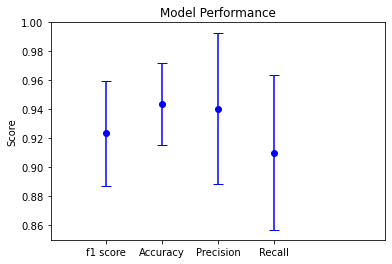

In [19]:
fig, ax = plt.subplots()
ax.errorbar(x=[1, 2, 3, 4], y=[scores1.mean(), scores2.mean(), scores3.mean(), scores4.mean()], 
            yerr=[scores1.std(), scores2.std(), scores3.std(), scores4.std()], fmt='o', capsize = 5, color = 'blue')
ax.set_xlim(0, 6)
ax.set_ylim(0.85, 1)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['f1 score', 'Accuracy', 'Precision', 'Recall'])
ax.set_ylabel('Score')
ax.set_title('Model Performance')
plt.show()

References:
1. [Scikit-learn hyperparameter optimization for MLPClassifier](https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b)
2. [Bayesian Optimization](https://www.kaggle.com/code/plbalmeida/task-1-classifier-bayesian-optimization/notebook)